## Preprocessing

In [1]:
# Import our dependencies
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN'])

In [3]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [4]:
# Look at NAME value counts for binning
name_count = application_df['NAME'].value_counts()
name_count


PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [5]:
# Choose a cutoff value and create a list of names to be replaced
# use the variable name `name_counts_to_replace`
name_counts_to_replace = list(name_count[name_count<10].index)
name_counts_to_replace


['HEALTH CARE FOR ALL-CALIFORNIA',
 'PHI ETA SIGMA NATIONAL HONOR SOCIETY INC',
 'RECREATION CENTERS OF SUN CITY INC',
 'ASSOCIATION OF SCHOOL BOOSTER CLUBS',
 'INTERNATIONAL SOCIETY DAUGHTERS OF UTAH PIONEERS',
 'SOUTHERN OFF ROAD BICYCLE ASSOCIATION',
 'OREGON EDUCATION ASSOCIATION',
 'NATIONAL CHRISTIAN CHARITABLE FOUNDATION INC',
 'NATIONAL COUNCIL OF NEGRO WOMEN INC',
 'INDEPENDENT ELECTRICAL CONTRACTORS INC',
 'PAGAN PRIDE PROJECT INC',
 'TUSKEGEE AIRMEN INC',
 'ALPHA PHI OMEGA',
 'SEATTLE CHILDRENS HOSPITAL',
 'FBI NATIONAL CITIZENS ACADEMY ALUMNI ASSOCIATION INC',
 'UNITED OSTOMY ASSOCIATIONS OF AMERICA INC',
 'AMERICAN CHEMICAL SOCIETY',
 'MILITARY ORDER OF THE WORLD WARS',
 'PTA FLORIDA CONGRESS',
 'NATIONAL LEAGUE OF YOUNG MEN INC',
 'AMERICAN HIBISCUS',
 'AMERICAN VOLKSSPORT ASSOCIATION INC',
 'THETA NU XI MULTICULTURAL SORORITY INC',
 'QUOTA CLUB INTERNATIONAL INC',
 'AMERICAN INSTITUTE OF GRAPHIC ARTS',
 'AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS',
 'SHRINE

In [6]:
# Replace in dataframe
for nms in name_counts_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(nms,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_type = application_df['APPLICATION_TYPE'].value_counts()
app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type[app_type<500].index)
application_types_to_replace

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
countsbinning = application_df['CLASSIFICATION'].value_counts()

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
countsclassification = countsbinning[countsbinning>1]
countsclassification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (countsbinning[countsbinning<100].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

#drop column IS_SUCCESSFUL
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hn_layer1=7
hn_layer2=14
hn_layer3=21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer2, activation='relu'))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hn_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 1911      
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 2,360
Trainable params: 2,360
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 3s 3ms/step - loss: 0.5322 - accuracy: 0.7449 - val_loss: 0.4561 - val_accuracy: 0.7865
Epoch 2/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4570 - accuracy: 0.7796 - val_loss: 0.4456 - val_accuracy: 0.7883
Epoch 3/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4483 - accuracy: 0.7824 - val_loss: 0.4459 - val_accuracy: 0.7865
Epoch 4/100
684/684 [==============================] - 2s 2ms/step - loss: 0.4460 - accuracy: 0.7823 - val_loss: 0.4438 - val_accuracy: 0.7883
Epoch 5/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4439 - accuracy: 0.7838 - val_loss: 0.4425 - val_accuracy: 0.7927
Epoch 6/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4428 - accuracy: 0.7847 - val_loss: 0.4425 - val_accuracy: 0.7888
Epoch 7/100
684/684 [==============================] - 2s 3ms/step - loss: 0.4421 - accuracy: 0.7847 - val_loss: 0.4446 - val_accuracy: 0.7880

<Axes: >

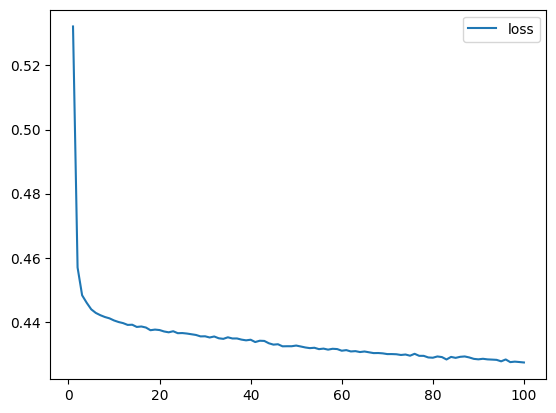

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<Axes: >

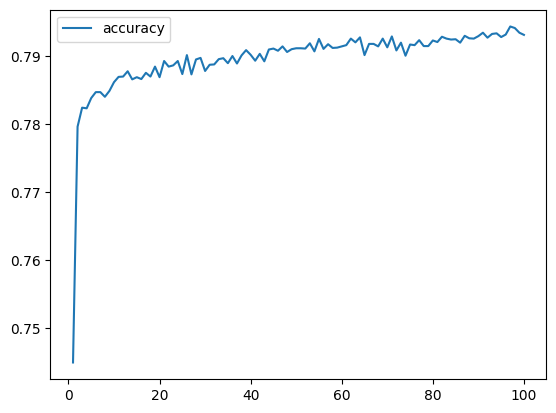

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4668 - accuracy: 0.7785 - 394ms/epoch - 1ms/step
Loss: 0.4667694866657257, Accuracy: 0.7785422801971436


In [22]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/output_data/AlphabetSoupCharity_Optimization.h5')
files.download('/output_data/AlphabetSoupCharity_Optimization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>